In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("email_campaign.csv")
df.head()


,index,name,account_number,email_name,sent_date,open_date,click_date,bounce_date,transaction_date,transaction_amount
0,0,Brian Harris,84256863,Email 1 - Welcome to Wanderlust Adventures,11/11/2021 22:24,11/11/2021 22:47,11/11/2021 22:51,NaN,NaN,NaN
1,4,Travis Gibson,87296226,Email 1 - Welcome to Wanderlust Adventures,12/5/2022 16:20,12/5/2022 16:25,NaN,NaN,NaN,NaN
2,8,Hector Hurst,14429475,Email 1 - Welcome to Wanderlust Adventures,3/10/2022 6:23,3/10/2022 7:13,NaN,NaN,NaN,NaN
3,12,Stephanie Scott,12583440,Email 1 - Welcome to Wanderlust Adventures,7/5/2022 15:10,7/5/2022 15:40,NaN,NaN,NaN,NaN
4,16,Hunter Jensen,46846333,Email 1 - Welcome to Wanderlust Adventures,1/23/2020 17:58,NaN,NaN,NaN,NaN,NaN


In [3]:
df['opened'] = df['open_date'].notna().astype(int)
df['clicked'] = df['click_date'].notna().astype(int)
df['converted'] = df['transaction_date'].notna().astype(int)

df[['opened', 'clicked', 'converted']].head()


,opened,clicked,converted
0,1,1,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,0


In [4]:
prob_click = df['clicked'].mean()
print("Probability that a user clicks an email:", round(prob_click, 3))


Probability that a user clicks an email: 0.206


In [5]:
clicked_users = df[df['clicked'] == 1]

prob_convert_given_click = clicked_users['converted'].mean()
print("Probability of conversion given click:", round(prob_convert_given_click, 3))


Probability of conversion given click: 0.102


In [6]:
conditional_table = pd.crosstab(
    df['clicked'],
    df['converted'],
    normalize='index'
)

conditional_table.columns = ['No Conversion', 'Converted']
conditional_table.index = ['Not Clicked', 'Clicked']

conditional_table


,No Conversion,Converted
Not Clicked,0.999611,0.000389
Clicked,0.897734,0.102266


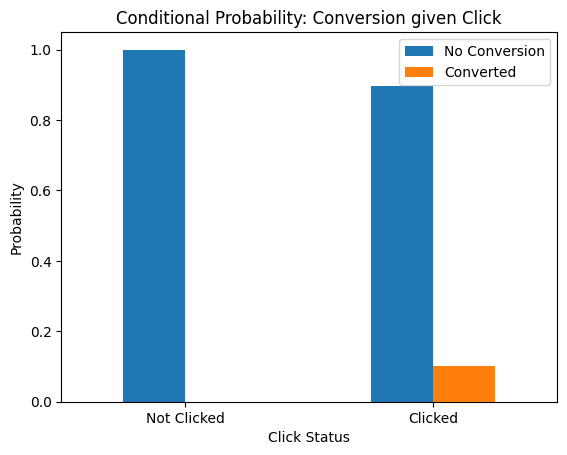

In [7]:
conditional_table.plot(kind='bar')
plt.title("Conditional Probability: Conversion given Click")
plt.xlabel("Click Status")
plt.ylabel("Probability")
plt.xticks(rotation=0)
plt.show()


In [8]:
funnel = {
    "Sent": len(df),
    "Opened": df['opened'].sum(),
    "Clicked": df['clicked'].sum(),
    "Converted": df['converted'].sum()
}

funnel_df = pd.DataFrame.from_dict(funnel, orient='index', columns=['Users'])
funnel_df


,Users
Sent,42099
Opened,34832
Clicked,8693
Converted,902
